In [90]:
import pandas as pd
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_treated.pkl'))

df = df.dropna()
df.head()

,ano,sigla_uf,escola_publica,id_aluno,situacao_censo,disciplina,proficiencia,erro_padrao,proficiencia_saeb,erro_padrao_saeb,...,frequenta_festas_comunidade,gosta_estudar_disciplina,faz_licao_casa,correcao_licao_casa,utiliza_biblioteca_escola,rede,id_escola,serie,turno,desempenho_aluno_cat
27111,2015,PB,1,17523018,0,MT,-0.627672,0.648351,214.882332,36.237847,...,1.0,0.0,1.0,1.0,1.0,2,25083490,9,3,0
27112,2015,PB,1,17491737,0,LP,-1.027257,0.354996,193.389947,19.557923,...,2.0,1.0,2.0,2.0,2.0,2,61134907,9,1,0
27115,2015,PB,1,17491737,0,MT,-0.807123,0.639382,204.852398,35.736548,...,2.0,1.0,2.0,2.0,2.0,2,61134907,9,1,0
27122,2015,PB,1,17488937,0,LP,-0.341425,0.380753,231.174739,20.976963,...,1.0,1.0,2.0,2.0,1.0,2,25027573,9,1,1
27123,2015,PB,1,17488937,0,MT,-0.906444,0.545208,199.301116,30.472944,...,1.0,1.0,2.0,2.0,1.0,2,25027573,9,1,0


In [91]:
# distribuição das classes
df['desempenho_aluno'].value_counts(dropna=False)

desempenho_aluno
Básico          27146
Insuficiente    13118
Proficiente      8646
Avançado         1446
Name: count, dtype: int64

In [92]:
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno']

In [93]:
# para cada coluna tirando as exclude, mostrar cada valor único
for col in df.drop(columns=exclude).columns:
    print(col, df[col].unique())

idade [18 17 16 15 14 13]
escolaridade_mae [4. 1. 0. 2. 3. 5.]
mae_sabe_ler_escrever [1 0]
mae_le [1. 0.]
escolaridade_pai [1. 3. 4. 2. 0. 5.]
pai_sabe_ler_escrever [1. 0.]
pai_le [1. 0.]
responsaveis_incentivam_realizacao_licao_casa [1. 0.]
responsaveis_incentivam_estudos [1. 0.]
responsaveis_incentivam_leitura [1. 0.]
responsaveis_incentivam_comparecer_aulas [1. 0.]
possui_computador [1. 0. 2. 3. 4.]
tempo_lazer [1. 4. 2. 3. 0.]
leitura_jornais [1. 0. 2.]
leitura_livros_geral [1. 2. 0.]
leitura_literatura_infantojuvenil [1. 2. 0.]
leitura_historia_quadrinhos [1. 2. 0.]
leitura_revista_comportamento [1. 2. 0.]
leitura_revistas_geral [1. 2. 0.]
leitura_internet [0. 1. 2.]
frequenta_biblioteca [1. 0. 2.]
frequenta_cinema [0. 2. 1.]
frequenta_espetaculo_exposicao [1. 2. 0.]
frequenta_festas_comunidade [1. 2. 0.]
gosta_estudar_disciplina [0. 1.]
faz_licao_casa [1. 2. 0.]
correcao_licao_casa [1. 2. 0.]
utiliza_biblioteca_escola [1. 2. 0.]
desempenho_aluno_cat [0 1 2 3]


In [94]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from IPython.display import clear_output

clear_output()

In [95]:
df = df[df['disciplina'] == 'MT']

https://www.kaggle.com/code/cicerosc/trabalhofinal

In [96]:
# transforming target

median = df['proficiencia'].median()

print(median)

df['target'] = np.where(df['proficiencia'] > median, 1, 0)
df['target'].value_counts()

-0.107822


target
0    12604
1    12604
Name: count, dtype: int64

In [97]:
X = df.drop(columns=exclude + ['target'])
y = df['target']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
# print unique values for each col
for col in range(X_train.shape[1]):
    print(col, np.unique(X_train[:, col]))

0 [0.  0.2 0.4 0.6 0.8 1. ]
1 [0.  0.2 0.4 0.6 0.8 1. ]
2 [0. 1.]
3 [0. 1.]
4 [0.  0.2 0.4 0.6 0.8 1. ]
5 [0. 1.]
6 [0. 1.]
7 [0. 1.]
8 [0. 1.]
9 [0. 1.]
10 [0. 1.]
11 [0.   0.25 0.5  0.75 1.  ]
12 [0.   0.25 0.5  0.75 1.  ]
13 [0.  0.5 1. ]
14 [0.  0.5 1. ]
15 [0.  0.5 1. ]
16 [0.  0.5 1. ]
17 [0.  0.5 1. ]
18 [0.  0.5 1. ]
19 [0.  0.5 1. ]
20 [0.  0.5 1. ]
21 [0.  0.5 1. ]
22 [0.  0.5 1. ]
23 [0.  0.5 1. ]
24 [0. 1.]
25 [0.  0.5 1. ]
26 [0.  0.5 1. ]
27 [0.  0.5 1. ]
28 [0.         0.33333333 0.66666667 1.        ]


In [100]:
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 4)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125 (500.00 B)

 Trainable params: 125 (500.00 B)

 Non-trainable params: 0 (0.00 B)

In [101]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[es], validation_data=(X_val, y_val))

Epoch 1/100
631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.5626 - loss: 0.7236 - val_accuracy: 0.5579 - val_loss: 0.8572
Epoch 2/100
631/631 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.7647 - loss: 0.5958 - val_accuracy: 0.5549 - val_loss: 2.0487
Epoch 3/100
631/631 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.8142 - loss: 0.5126 - val_accuracy: 0.5986 - val_loss: 2.2111
Epoch 4/100
631/631 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.8287 - loss: 0.4724 - val_accuracy: 0.6348 - val_loss: 1.6526
Epoch 5/100
631/631 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.8308 - loss: 0.4499 - val_accuracy: 0.6375 - val_loss: 1.3706
Epoch 6/100
631/631 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.8317 - loss: 0.4386 - val_accuracy: 0.6395 - val_loss: 1.1997
Epoch 7/100
631/631 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.8321 - loss: 0.4266 - val_accuracy: 0.6506 - val_loss: 0.8885
Epoch 8/100
631/631 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.8366 - loss: 0

In [102]:
def max_neurons(qtd_dados, qtd_features):
    return np.floor((qtd_dados - 10) / (10 * (qtd_features + 2)))

qtd_dados = X_train.shape[0]
qtd_features = X_train.shape[1]

print(max_neurons(qtd_dados, qtd_features))

qtd_dados = 300
qtd_features = 2

print(max_neurons(qtd_dados, qtd_features))

65.0
7.0


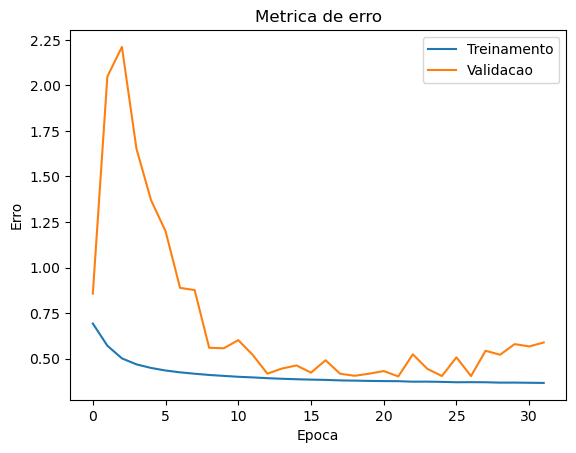

631/631 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step

--> Acuracia (treino): 0.8372
--> Acuracia (validacao): 0.8344
--> acc_train - acc_val = 0.0028
--> E_val - E_in = 0.2220


In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
# Instancia o modelo Random Forest
rf = RandomForestClassifier()

# Ajuste de hiperparâmetros (opcional)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=2)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_rf = grid_search.best_estimator_

# Previsão
y_pred = best_rf.predict(X_test)

# Avaliação
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 18 candidates, totalling 54 fits


/home/erlo/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/erlo/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END .max_depth=5, min_s

In [ ]:
# training the model on training set 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}
grid = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=param_grid, cv=5)

%time grid.fit(X_train, y_train)
print(grid.best_params_)
